In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes_df = pd.read_csv("./Dataset.csv")

In [3]:
print(diabetes_df.head())
print(diabetes_df.info())
print(diabetes_df.describe())

   glucose  bloodpressure  diabetes
0       40             85         0
1       40             92         0
2       45             63         1
3       45             80         0
4       40             73         1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB
None
          glucose  bloodpressure    diabetes
count  995.000000     995.000000  995.000000
mean    44.306533      79.184925    0.500503
std      6.707567       9.340204    0.500251
min     20.000000      50.000000    0.000000
25%     40.000000      72.000000    0.000000
50%     45.000000      80.000000    1.000000
75%     50.000000      87.000000    1.000000
max     70.000000     100.000000    1.000000


In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Tạo features và target
X = diabetes_df.iloc[:,:-1] # X = diabetes_df[['glucose','bloodpressure']]
y = diabetes_df.iloc[:,-1] # y = diabetes_df['diabetes']

In [5]:
#Chia dl thành tập hl và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
#Kiểm tra kthuoc tập dl
print(f"Số mẫu huấn luyện: {len(X_train)}")
print(f"Số mẫu Kiểm tra: {len(X_test)}")

Số mẫu huấn luyện: 796
Số mẫu Kiểm tra: 199


In [7]:
# Xây dựng và huấn luyện mô hình
#Khởi tạo cây quyết định
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)

In [8]:
#Huấn luyện mô hình trên tập huấn luyện
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [9]:
# Dự đoán trên tập test
y_pred = dt_model.predict(X_test)

In [10]:
#Tính độ chính xác của mô hình
accuracy = accuracy_score(y_test,y_pred)
print(f"Độ chính xác của mô hình: {accuracy*100:.2f} %")

Độ chính xác của mô hình: 92.46 %


In [11]:
#Báo cáo chi tiết phân loại
print("\n Báo cáo chi tiết phân loại:")
print(classification_report(y_test,y_pred,target_names=['Bị bệnh','Không bị bệnh']))


 Báo cáo chi tiết phân loại:
               precision    recall  f1-score   support

      Bị bệnh       0.92      0.91      0.92        93
Không bị bệnh       0.93      0.93      0.93       106

     accuracy                           0.92       199
    macro avg       0.92      0.92      0.92       199
 weighted avg       0.92      0.92      0.92       199



In [12]:
#Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test,y_pred)
print("Ma trận nhầm lẫn: ")
print(conf_matrix)


Ma trận nhầm lẫn: 
[[85  8]
 [ 7 99]]


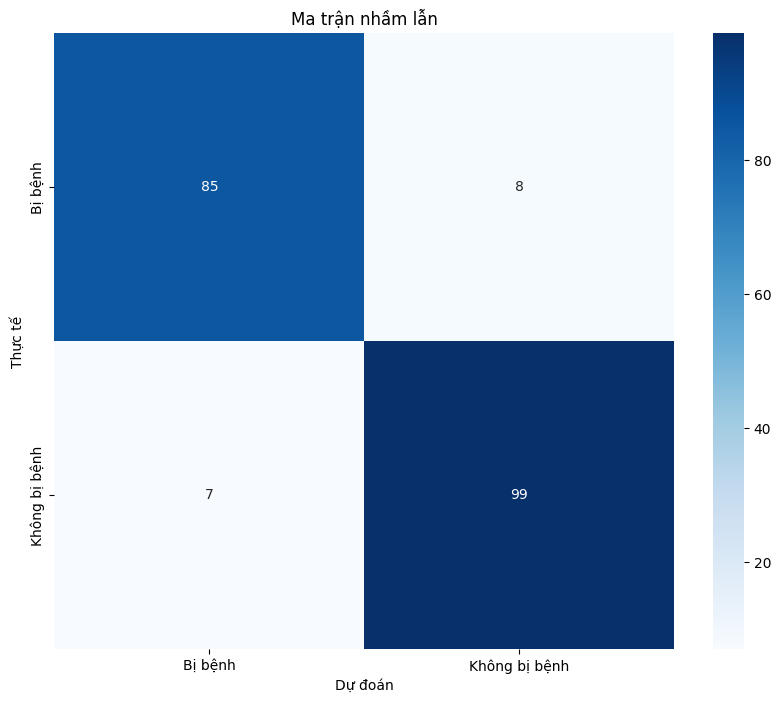

In [13]:
#Ma trận nhầm lẫn dạng biểu đồ
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues',xticklabels=['Bị bệnh','Không bị bệnh'],yticklabels=['Bị bệnh','Không bị bệnh'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title("Ma trận nhầm lẫn");

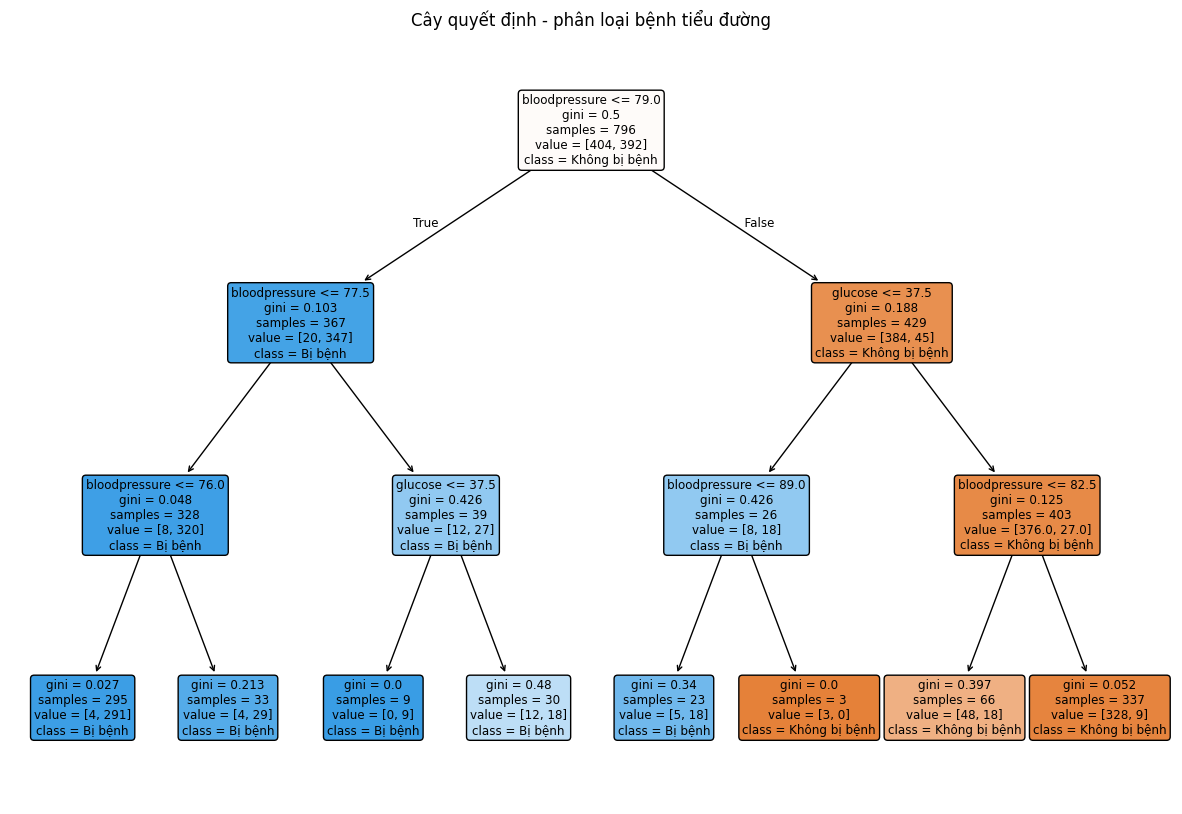

In [14]:
# cây quyết định
plt.figure(figsize=(15,10))
plot_tree(dt_model,feature_names=['glucose','bloodpressure'], class_names=['Không bị bệnh','Bị bệnh'],filled=True,rounded=True)
plt.title("Cây quyết định - phân loại bệnh tiểu đường");

In [17]:
# Dữ liệu mới để dự đoán
new_df = pd.DataFrame({
    'glucose':[120],
    'bloodpressure':[75]
})
# Dự đoán nhãn cho dữ liệu mới
new_prediction = dt_model.predict(new_df)

# Hiển thị kết quả dự đoán
if new_prediction[0] == 0:
    print("\nDữ liệu mới dự đoán: Người này KHÔNG bị tiểu đường.")
else:
    print("\nDữ liệu mới dự đoán: Người này BỊ tiểu đường.")

# Nếu muốn xem xác suất dự đoán
new_prediction_proba = dt_model.predict_proba(new_df)
print("\nXác suất dự đoán (0 - Không bệnh, 1 - Bị bệnh):")
print(new_prediction_proba)



Dữ liệu mới dự đoán: Người này BỊ tiểu đường.

Xác suất dự đoán (0 - Không bệnh, 1 - Bị bệnh):
[[0.01355932 0.98644068]]
